# Problem Statement



* The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases,

* contains information of 768 women from a population near Phoenix, Arizona, USA.

* The outcome tested was Diabetes, 258 tested positive and 500 tested negative.

* Therefore, there is one target (dependent) variable
*  and the 8 attributes (TYNECKI, 2018):
 pregnancies, OGTT(Oral Glucose Tolerance Test), blood pressure, skin thickness, insulin, BMI(Body Mass Index), age, pedigree diabetes function. The Pima population has been under study by the National Institute of Diabetes and Digestive and Kidney Diseases at intervals of 2 years since 1965. As epidemiological evidence indicates that T2DM results from interaction of genetic and environmental factors, the Pima Indians Diabetes Dataset includes information about attributes that could and should be related to the onset of diabetes and its future complications.

<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [40]:
#Import all the necessary modules

import numpy as np
import pandas as pd

import seaborn as sns
%matplotlib inline
from functools import reduce
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import lightgbm as lgb


# Load the PIMA Indian Diabetes file into Python DataFrame.


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df=pd.read_csv('/content/drive/MyDrive/0.Latest_DS_Course/Ensemble/1.Bagging/RandomForest/Diabetes.csv')

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Print 10 samples from the dataset

In [43]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [44]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
703,2,129,0,0,0,38.5,0.304,41,0
223,7,142,60,33,190,28.8,0.687,61,0
748,3,187,70,22,200,36.4,0.408,36,1
373,2,105,58,40,94,34.9,0.225,25,0
228,4,197,70,39,744,36.7,2.329,31,0
602,1,124,74,36,0,27.8,0.100,30,0
67,2,109,92,0,0,42.7,0.845,54,0
3,1,89,66,23,94,28.1,0.167,21,0
528,0,117,66,31,188,30.8,0.493,22,0
652,5,123,74,40,77,34.1,0.269,28,0


# Print the datatypes of each column and the shape of the dataset

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [46]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [47]:
df.shape

(768, 9)

# Replace all the 0s in the column with the median of the same column value accordingly.

In [48]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
df['Glucose'].replace(0,df['Glucose'].median(), inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].median(), inplace=True)
df['Insulin'].replace(0,df['Insulin'].median(), inplace=True)
df['BMI'].replace(0,df['BMI'].median(), inplace=True)



<ipython-input-49-3b5fc4aa2e37>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].replace(0,df['Glucose'].median(), inplace=True)
<ipython-input-49-3b5fc4aa2e37>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

# Print the descriptive statistics of each & every column using describe() function

In [50]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# See the distribution of 'Class' variable and plot it using appropriate graph.

<ipython-input-51-635839731f63>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['Outcome']).plot(kind='bar')


<Axes: xlabel='Outcome'>

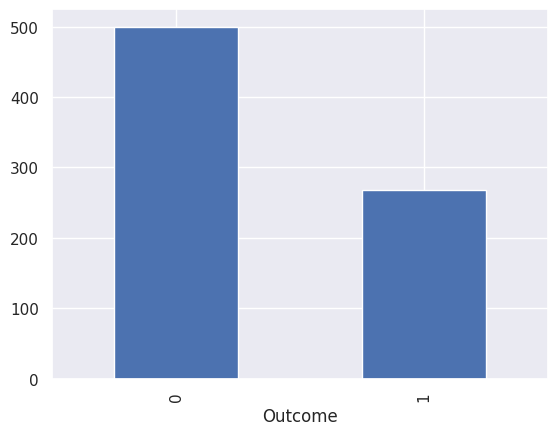

In [51]:
pd.value_counts(df['Outcome']).plot(kind='bar')

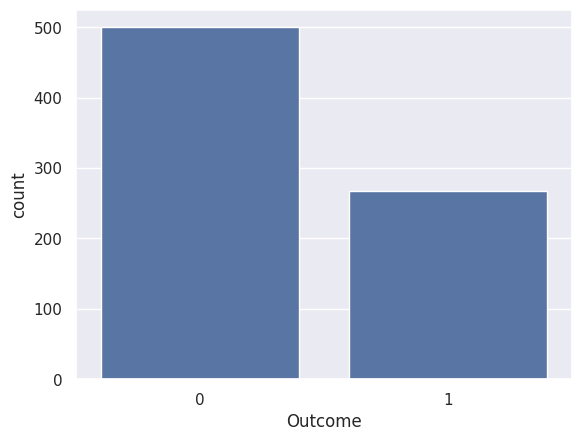

In [52]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Outcome", data=df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables


In [53]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


Using the plot - infer the relationship between different variables

In [54]:
sns.pairplot(df , hue='Outcome' , diag_kind = 'kde')

Output hidden; open in https://colab.research.google.com to view.

# Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [55]:
X =  df.drop(["Outcome"], axis=1)
y =  df.pop("Outcome")

train_set, test_set, train_labels, test_labels = train_test_split(X,y,test_size=.3,random_state=1,stratify=y)


In [56]:
train_set.shape

(537, 8)

In [57]:
test_set.shape

(231, 8)

# Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [58]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' ,max_depth=10)
dt_model.fit(train_set,train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

# Print the accuracy of the model & print the confusion matrix

In [59]:
training_acc = dt_model.score(train_set,train_labels)
test_acc = dt_model.score(test_set, test_labels)

print(training_acc)
print (test_acc)

y_predict = dt_model.predict(test_set)

print(metrics.confusion_matrix(test_labels, y_predict))
from sklearn.metrics import accuracy_score
print (accuracy_score(test_labels, y_predict))

0.9664804469273743
0.70995670995671
[[121  29]
 [ 38  43]]
0.70995670995671


Print the feature importance of the decision model - Optional

In [60]:
pd.set_option('display.max_rows', X.shape[0]+1)

display (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X.columns))

,Imp
Pregnancies,0.048891
Glucose,0.279185
BloodPressure,0.075068
SkinThickness,0.041844
Insulin,0.060881
BMI,0.165405
DiabetesPedigreeFunction,0.172909
Age,0.155817


In [61]:
dt_model.feature_importances_

array([0.04889058, 0.27918538, 0.07506813, 0.04184396, 0.06088081,
       0.16540531, 0.17290919, 0.15581665])

# Apply the Random forest model and print the accuracy of Random forest Model

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 150, oob_score =True)
rfcl = rfcl.fit(train_set, train_labels)


In [63]:
y_predict = rfcl.predict(test_set)
print(rfcl.score(train_set , train_labels))
print(rfcl.score(test_set , test_labels))
print(metrics.confusion_matrix(test_labels, y_predict))

1.0
0.7402597402597403
[[129  21]
 [ 39  42]]


[[129  21]
 [ 39  42]]


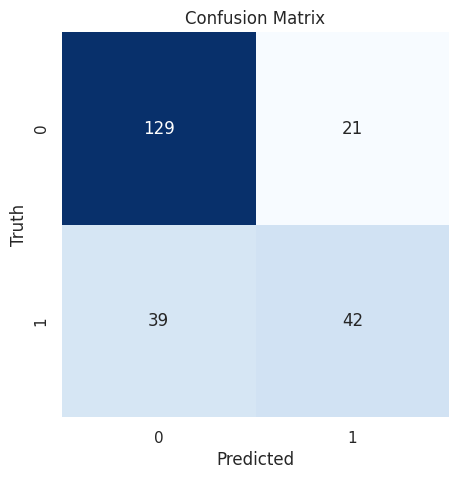

In [64]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_predict)

# Print the confusion matrix
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

[[129  21]
 [ 39  42]]


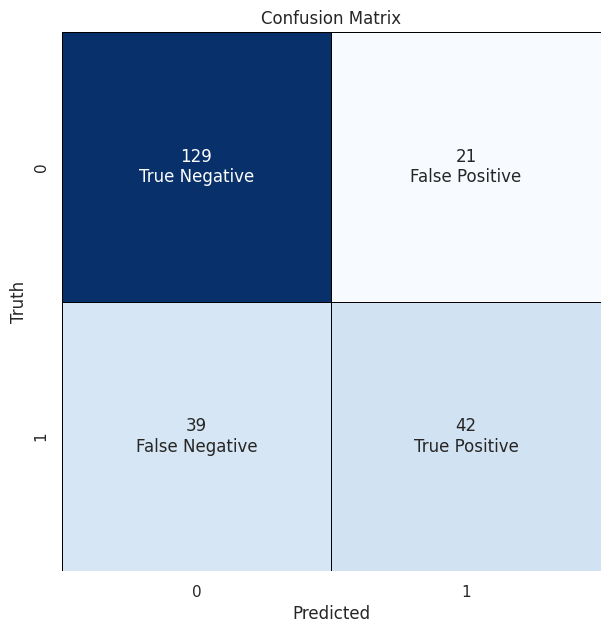

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_predict)

# Define the labels for each cell in the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
label_matrix = [
    [f'{cm[0, 0]}\n{labels[0]}', f'{cm[0, 1]}\n{labels[1]}'],
    [f'{cm[1, 0]}\n{labels[2]}', f'{cm[1, 1]}\n{labels[3]}']
]

# Print the confusion matrix
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=label_matrix, fmt='', cmap='Blues', cbar=False, square=True, linewidths=0.5, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


## Fine tuning Random forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [76]:

# Step 1: Define the base model
rfcl = RandomForestClassifier(oob_score=True, random_state=42)


In [77]:

# Step 2: Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2']
}


In [78]:

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=rfcl,
                           param_grid=param_grid,
                           cv=5,           # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1,      # Use all CPU cores
                           verbose=2)


In [79]:

# Step 4: Fit the model to the training data
grid_search.fit(train_set, train_labels)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [71]:

# Step 5: Get the best model
best_rfcl = grid_search.best_estimator_
print("Best Parameters Found:\n", grid_search.best_params_)


Best Parameters Found:
 {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [72]:

# Step 6: Predict on test set
y_pred = best_rfcl.predict(test_set)


In [73]:

# Step 7: Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(test_labels, y_pred))

print("\nClassification Report:")
print(classification_report(test_labels, y_pred))

print("Accuracy Score:", accuracy_score(test_labels, y_pred))




Confusion Matrix:
[[128  22]
 [ 37  44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       150
           1       0.67      0.54      0.60        81

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Accuracy Score: 0.7445887445887446


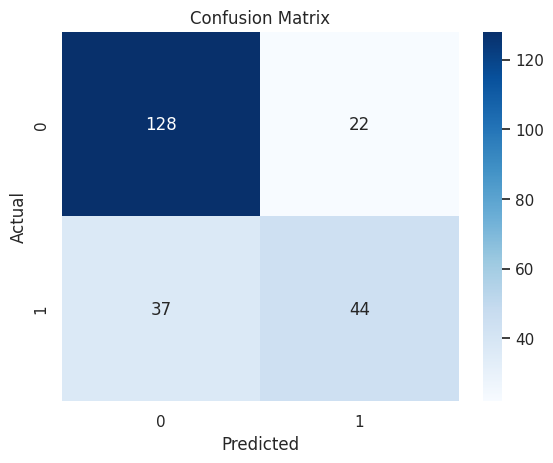

In [74]:

# Step 8: Plot confusion matrix
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()